In [1]:
import matplotlib.pyplot as plt
import pandas as pd

stats = pd.read_csv('/run/media/sharwinbobde/ExtraStorage/neighbour_search/stats/2021-04-24-T15-54-49.csv')
print(stats)

                      timestamp  curriculum_level  iteration    rows  \
0    2021-04-24 15:47:35.691776                 0          0   50000   
1    2021-04-24 15:47:36.010366                 0          1   50000   
2    2021-04-24 15:47:36.318117                 0          2   50000   
3    2021-04-24 15:47:36.628897                 0          3   50000   
4    2021-04-24 15:47:36.932368                 0          4   50000   
..                          ...               ...        ...     ...   
165  2021-04-24 15:54:34.239595                12         45  605777   
166  2021-04-24 15:54:38.047621                12         46  605777   
167  2021-04-24 15:54:41.853033                12         47  605777   
168  2021-04-24 15:54:45.672907                12         48  605777   
169  2021-04-24 15:54:49.486139                12         49  605777   

     quality_indicator_mean  quality_indicator_std  
0               3523.457160             558.853587  
1               3239.188720  

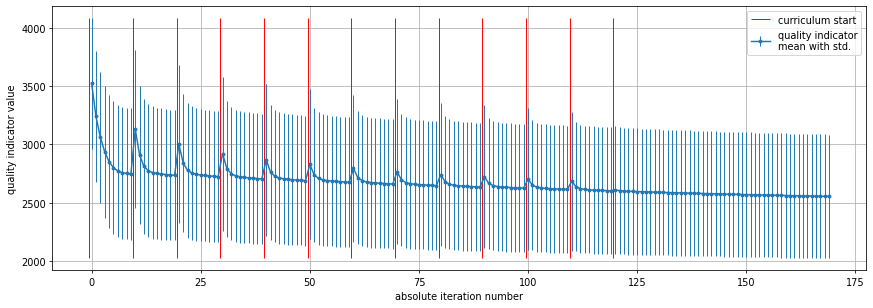

In [20]:
import numpy as np
fig = plt.figure(figsize=(15,5), dpi=70)
curr_indices = []
for curr in stats.curriculum_level.unique():
    curr_indices.append(stats.curriculum_level.searchsorted(curr, side='left'))

plt.vlines(np.array(curr_indices)-0.5,
           ymin=stats.quality_indicator_mean[stats.shape[0]-1] - stats.quality_indicator_std[stats.shape[0]-1],
           ymax=stats.quality_indicator_mean[0] + stats.quality_indicator_std[0],
           colors='r', linewidth=1,
           label='curriculum start')

plt.errorbar(x=stats.index, y=stats['quality_indicator_mean'], yerr=stats['quality_indicator_std'],
             fmt='o-', elinewidth=1, markersize=3,
             label='quality indicator\nmean with std.')

plt.grid(True)
plt.ylabel("quality indicator value")
plt.xlabel("absolute iteration number")
plt.legend()
plt.savefig('../images/nearest-neighbour-quality-indicator.svg')

In [3]:
df = pd.read_parquet('/run/media/sharwinbobde/ExtraStorage/neighbour_search/neighbours.parquet')
df


,rec_MBID,row_id,neighbours,neighbour_dist
0,8d378d68-285e-4ff3-8bda-31fb1c8537e0,0,"[62791, 313409, 196289, 101035, 286931, 17711,...","[258, 259, 278, 286, 286, 287, 289, 290, 291, ..."
1,8ded50f0-8d4f-4ee4-8b8c-adeb815b300c,1,"[43597, 41889, 413405, 155961, 17458, 35176, 1...","[172, 185, 187, 189, 191, 194, 197, 198, 198, ..."
2,8d770b20-e4ad-433d-aa28-af6967f4c9f3,2,"[251318, 33045, 35502, 122098, 338457, 10338, ...","[316, 330, 335, 336, 336, 340, 341, 341, 342, ..."
3,8dac27be-b9ac-47a1-88c6-8dd808ac48dd,3,"[20021, 9713, 141941, 194132, 60622, 185195, 4...","[307, 312, 324, 338, 338, 338, 338, 339, 340, ..."
4,8de6ae93-9a23-468d-b43a-3db1ef18dee7,4,"[212627, 1763, 87818, 80125, 94226, 5507, 2586...","[209, 214, 216, 218, 219, 223, 224, 227, 230, ..."
...,...,...,...,...
605772,ff237426-62ff-4b10-b836-0c9455c9e8a2,605772,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[65535, 65535, 65535, 65535, 65535, 65535, 655..."
605773,ffc6165b-b6eb-4e8c-90c1-1c5d045735ad,605773,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[65535, 65535, 65535, 65535, 65535, 65535, 655..."
605774,ffcd3125-2176-459e-8fa9-eff992408790,605774,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[65535, 65535, 65535, 65535, 65535, 65535, 655..."
605775,ff2a6888-1906-4ecc-bbb1-8f4e64d6af32,605775,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[65535, 65535, 65535, 65535, 65535, 65535, 655..."
